In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploadedd = files.upload()

Saving test.csv to test.csv


In [3]:
import pandas as pd
import statsmodels.api as sm

In [197]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# The difference between those two data files is the presence of the SalePrice column.
# We should predict from the data train to the data test

In [5]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


**LITERATURE REVIEW**

In [ ]:
#For choosing the right variables that have a strong relationship to the SalePrice, we use the literature review technique

In [8]:
from google.colab import files
uploadeddd = files.upload()

Saving Data riset.csv to Data riset.csv


In [116]:
import pandas as pd

riset = pd.read_csv('Data riset.csv', encoding='latin1')
riset


,No,Paper,Author,Metode,Size,Location,Noise,View,Age of building,Quality Material,Pool Number,Bathroom Number,Bedroom Number,Utilities,Design
0,1,A Study on Housing Price Prediction,Rajeshwari and N. Manjunath,"Quantitative, Logistic Regression",YES,YES,NO,NO,NO,NO,NO,NO,NO,YES,NO
1,2,Effect of Micro Economic Factor on Residental ...,"Ibrahim, I., et al","Quantitative, descriptive statistic",YES,YES,NO,NO,YES,YES,NO,NO,NO,NO,YES
2,3,The Impact of Non-Market Attributes on Propert...,"Buszta, J., et al","Quantitative, Pearson Correlation",YES,YES,YES,YES,NO,YES,NO,NO,NO,NO,YES
3,4,An Analysis of Implicit Value of Property Char...,"Zulkarnain, Arvianti, T., et al","Quantitative, Regression",NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,5,Influential Factors on the Market Value of Res...,"Ferlan, N., et al","Quantitative, descriptive statistic",NO,YES,YES,YES,YES,YES,NO,NO,NO,NO,NO
5,6,Critical determinants of residential property ...,"Abidoye, R.B. and Chan, A.P.C","Mixed research, literature review and Qustionn...",YES,YES,NO,NO,YES,YES,NO,NO,NO,NO,NO
6,7,Spatial Differentiation and Influencing Facto...,"Xu, S. and Zhang, X","Quantitative, Regression",YES,YES,NO,YES,YES,YES,NO,NO,YES,NO,YES
7,8,Efficient property value estimation for singl...,"Lozano, S., et al","Quantitative, Regression",NO,NO,NO,NO,YES,NO,YES,YES,YES,NO,NO
8,9,HEDONIC PRICING MODEL (HPM) ON SOUTH TANGERANG...,"Darendra, N.S. and Riyanto, E","Quantitative, Regression",NO,YES,NO,YES,NO,NO,NO,YES,YES,NO,NO


In [124]:
print(f"""
- Size is described by LotArea
- Location and neighborhood can be seen by the alley column,
- Noise can be described by condition1
- Views can be displayed by LotConfig
- Age can be described by YearSold - YearRemodAdd
- Material Quality can be represented by OverallQual
- The number of pools, bedrooms, and bathrooms can be represented by TotalRmsAbvGrd
- Design can be described by HouseStyle""")


- Size is described by LotArea
- Location can be seen by the alley column,
- Noise can be described by condition 1
- Views can be displayed by LotConfig
- Age can be described by YearSold - YearRemodAdd
- Material Quality can be represented by OverallQual
- The number of pools, bedrooms, and bathrooms can be represented by TotalRmsAbvGrd
- Design can be described by HouseStyle


**CHECKING THE VARIABLES**



In [198]:
# Null Values Detection

print(train.columns[train.isnull().any()].tolist())
print(train['LotArea'].isnull().sum())
print(train['Condition1'].isnull().sum())
print(train['LotConfig'].isnull().sum())
print(train['OverallQual'].isnull().sum())
print(train['HouseStyle'].isnull().sum())
print(train['TotRmsAbvGrd'].isnull().sum())
print(train['YearRemodAdd'].isnull().sum())
print(train['YearBuilt'].isnull().sum())
print(train['SalePrice'].isnull().sum())


train['AgeBuild'] = train['YrSold'] - train['YearRemodAdd']
print(train['AgeBuild'].isnull().sum())

print(train['Alley'].isnull().sum())
train['Alleyyleng'] = train['Alley'].fillna(0)
print(train['Alleyyleng'].isnull().sum())


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
0
0
0
0
0
0
0
0
0
0
1369
0


**REGRESSION OF THE DATA TRAIN**

In [187]:
#Regression

import numpy as np
train['ln_AgeBuild'] = np.log(train['AgeBuild'] + 1)
train['ln_OverallQual'] = np.log(train['OverallQual'] + 1)
train['ln_LotArea'] = np.log(train['LotArea'] + 1)
train['rec_AgeBuild'] = 1 / (train['AgeBuild'] + 1)
train['ln_TotRmsAbvGrd'] = np.log(train['TotRmsAbvGrd'] + 1)
train['ln_YearBuilt'] = np.log(train['YearBuilt'] + 1)


#ln_AgeBuild and rec_AgeBuild cannot be executed because they contain -inf.
#So here the original form of AgeBuild will be used.

features = ['ln_LotArea','Condition1','LotConfig','HouseStyle','AgeBuild','Alleyyleng','ln_OverallQual', 'ln_TotRmsAbvGrd']

x_train = train[features]

X = pd.get_dummies(x_train, drop_first = True)
X = X.astype(float)
X = sm.add_constant(X)

train['ln_SalePrice'] = np.log(train['SalePrice'])
y_trainnn = train['ln_SalePrice']
y_trainnnn = y_trainnn.astype(float)

model = sm.OLS(y_trainnnn, X).fit()
print(model.summary())


residuals = model.resid

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     207.2
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:08:28   Log-Likelihood:                 384.64
No. Observations:                1460   AIC:                            -717.3
Df Residuals:                    1434   BIC:                            -579.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.5004      0.11

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [188]:
train[train['AgeBuild'] <= 0][['YearRemodAdd','YrSold','AgeBuild']].head()


,YearRemodAdd,YrSold,AgeBuild
11,2006,2006,0
13,2007,2007,0
20,2006,2006,0
58,2006,2006,0
87,2009,2009,0


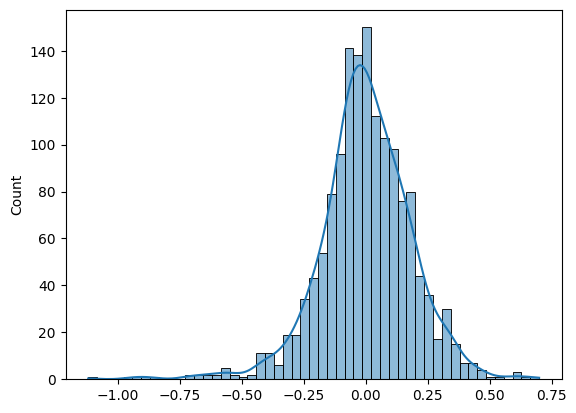

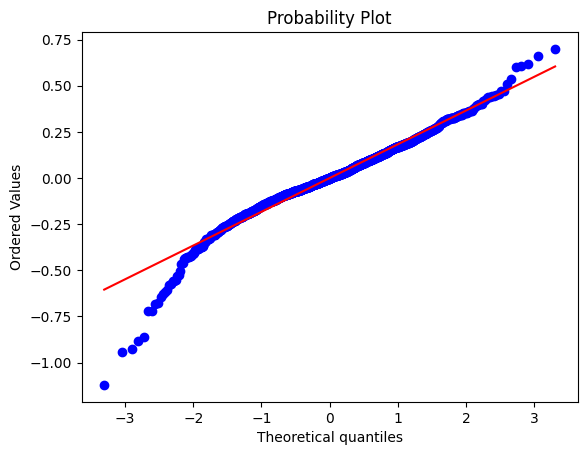

In [189]:
#Normality Test

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.show()

stats.probplot(residuals, dist='norm', plot=plt)
plt.show()

#Because this data has a lot of samples, so we can assume the data has a normal distribution residuals.

In [190]:
#Heteroscedasticity Test

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Langrange multiplier statistic', 'p-value','f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

#The data does not exhibit heteroscedasticity because the p-value of the BP test has shown a value which is more than 0.05.

{'Langrange multiplier statistic': np.float64(35.528912386176756), 'p-value': np.float64(0.0790580870305026), 'f-value': np.float64(1.4306632350712816), 'f p-value': np.float64(0.07772757613476262)}


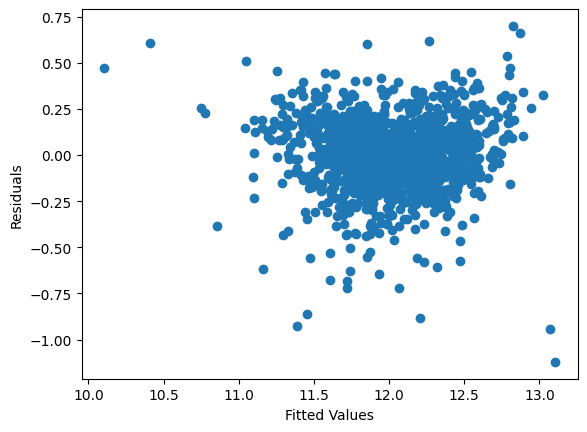

In [191]:
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#Here is the graph of residual variances to approve our assumption about the BP test

In [192]:
#Multicollinearity Test

from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif  =sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif.values,i)
                  for i in range (x_vif.shape[1])]
print (vif_data)

#There are none of variables that have a strong VIF value, more than 10. So, we can conclude there is no multicollinearity in this model.

             Variable         VIF
0               const  506.351878
1          ln_LotArea    1.384953
2            AgeBuild    1.559920
3      ln_OverallQual    1.762700
4     ln_TotRmsAbvGrd    1.983747
5    Condition1_Feedr    2.714537
6     Condition1_Norm    4.145841
7     Condition1_PosA    1.193824
8     Condition1_PosN    1.455758
9     Condition1_RRAe    1.274471
10    Condition1_RRAn    1.605127
11    Condition1_RRNe    1.055315
12    Condition1_RRNn    1.177350
13  LotConfig_CulDSac    1.350717
14      LotConfig_FR2    1.166759
15      LotConfig_FR3    1.066694
16   LotConfig_Inside    1.457585
17  HouseStyle_1.5Unf    1.125026
18  HouseStyle_1Story    3.418737
19  HouseStyle_2.5Fin    1.082785
20  HouseStyle_2.5Unf    1.083228
21  HouseStyle_2Story    3.150412
22  HouseStyle_SFoyer    1.325392
23    HouseStyle_SLvl    1.438087
24    Alleyyleng_Grvl    1.091263
25    Alleyyleng_Pave    1.076954


In [ ]:
#The OLS regression model proved to meet most of the classical assumptions, was simultaneously significant, and had high explanatory power (R² = 0.78).
#These results indicate that variables such as size, location, view, noise, building quality, age of building, and total room play a significant role in determining house selling prices.

**PREDICTING SALEPRICE ON THE DATA TEST**

In [193]:
#Null Value Test

print(train.columns[train.isnull().any()].tolist())
print(train['LotArea'].isnull().sum())
print(train['Condition1'].isnull().sum())
print(train['LotConfig'].isnull().sum())
print(train['OverallQual'].isnull().sum())
print(train['HouseStyle'].isnull().sum())
print(train['TotRmsAbvGrd'].isnull().sum())
print(train['YearRemodAdd'].isnull().sum())
print(train['YearBuilt'].isnull().sum())


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
0
0
0
0
0
0
0
0


In [199]:
#Building the variables for data test

test['AgeBuild'] = test['YrSold'] - test['YearRemodAdd']
print(test['AgeBuild'].isnull().sum())

print(test['Alley'].isnull().sum())
test['Alleyyleng'] = test['Alley'].fillna(0)
print(test['Alleyyleng'].isnull().sum())


0
1352
0


In [200]:
#Predict The SalePrice
model = sm.OLS(y_trainnnn, X).fit()

test['ln_OverallQual'] = np.log(test['OverallQual'] + 1)
test['ln_LotArea'] = np.log(test['LotArea'] + 1)
test['ln_TotRmsAbvGrd'] = np.log(test['TotRmsAbvGrd'] + 1)
test['ln_YearBuilt'] = np.log(test['YearBuilt'] + 1)


x_test = test[features]
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.astype(float)
x_test = x_test.reindex(columns=X.drop(columns='const').columns, fill_value=0)
x_test = sm.add_constant(x_test)

y_pred_log = model.predict(x_test)

y_pred = np.exp(y_pred_log)

test['Predicted_SalePrice'] = y_pred
print(test['Predicted_SalePrice'].head())







0    120272.996173
1    164547.120765
2    156035.897886
3    184059.406611
4    194633.955815
Name: Predicted_SalePrice, dtype: float64


**RESULT EVALUATION**

In [201]:
#Defining the distribution between data train and prediction for data test

print(train['SalePrice'].describe())
print(test['Predicted_SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
count      1459.000000
mean     173561.425506
std       61952.991852
min       35860.671125
25%      127542.826982
50%      162294.177352
75%      212410.671970
max      541083.894522
Name: Predicted_SalePrice, dtype: float64
